<img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

# Manipulating Dimensions (Data Resolution)

Sometimes we need to change the resolution of our data. We might need to look at inferred values between dimension (grid) spaces
or change the dimension spacing completely (for instance to add another variable). Learning goals:

- Interpolate data to new coordinates

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

np.random.seed(0)

In [2]:
arr = xr.DataArray(
    np.random.randn(4, 6),
    dims=("x", "y"),
    coords={
        "x": [-3.2, 2.1, 5.3, 6.5],
        "y": pd.date_range("2009-01-05", periods=6, freq="M"),
    },
)
arr

<xarray.DataArray (x: 4, y: 6)>
array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885,  0.4105985 ,  0.14404357,
         1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433,  1.49407907,
        -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982,  0.6536186 ,  0.8644362 ,
        -0.74216502]])
Coordinates:
  * x        (x) float64 -3.2 2.1 5.3 6.5
  * y        (y) datetime64[ns] 2009-01-31 2009-02-28 ... 2009-05-31 2009-06-30

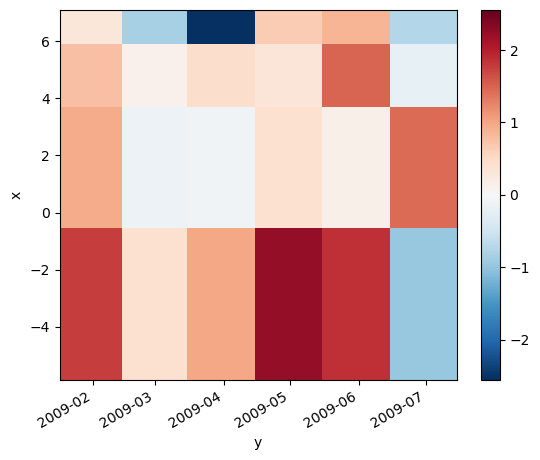

In [7]:
arr.plot()

## Interpolation

If we want to look at values between the current grid cells (interpolation), we
can do that with `interp` (requires `scipy`):


In [13]:
arr.interp(
    x=np.linspace(2, 6, 10),
    y=pd.date_range("2009-04-01", "2009-04-30", freq="D"),
)

<xarray.DataArray (x: 10, y: 30)>
array([[-6.52066740e-02, -4.76087761e-02, -3.00108783e-02,
        -1.24129804e-02,  5.18491747e-03,  2.27828153e-02,
         4.03807132e-02,  5.79786111e-02,  7.55765089e-02,
         9.31744068e-02,  1.10772305e-01,  1.28370203e-01,
         1.45968100e-01,  1.63565998e-01,  1.81163896e-01,
         1.98761794e-01,  2.16359692e-01,  2.33957590e-01,
         2.51555488e-01,  2.69153385e-01,  2.86751283e-01,
         3.04349181e-01,  3.21947079e-01,  3.39544977e-01,
         3.57142875e-01,  3.74740773e-01,  3.92338671e-01,
         4.09936568e-01,  4.27534466e-01,  4.45132364e-01],
       [-2.94432103e-02, -1.45548765e-02,  3.33457251e-04,
         1.52217910e-02,  3.01101248e-02,  4.49984586e-02,
         5.98867924e-02,  7.47751261e-02,  8.96634599e-02,
         1.04551794e-01,  1.19440127e-01,  1.34328461e-01,
         1.49216795e-01,  1.64105129e-01,  1.78993463e-01,
         1.93881796e-01,  2.08770130e-01,  2.23658464e-01,
         2.38546798e-01,  2.53435131e-01,  2.68323465e-01,
         2.83211799e-01,  2.98100133e-01,  3.12988467e-01,
         3.27876800e-01,  3.42765134e-01,  3.57653468e-01,
         3.72541802e-01,  3.87430135e-01,  4.02318469e-01],
...
       [-1.74483269e-01, -1.54611067e-01, -1.34738864e-01,
        -1.14866662e-01, -9.49944589e-02, -7.51222563e-02,
        -5.52500537e-02, -3.53778511e-02, -1.55056484e-02,
         4.36655420e-03,  2.42387568e-02,  4.41109594e-02,
         6.39831621e-02,  8.38553647e-02,  1.03727567e-01,
         1.23599770e-01,  1.43471973e-01,  1.63344175e-01,
         1.83216378e-01,  2.03088580e-01,  2.22960783e-01,
         2.42832986e-01,  2.62705188e-01,  2.82577391e-01,
         3.02449594e-01,  3.22321796e-01,  3.42193999e-01,
         3.62066201e-01,  3.81938404e-01,  4.01810607e-01],
       [-1.24348073e+00, -1.18266041e+00, -1.12184009e+00,
        -1.06101978e+00, -1.00019946e+00, -9.39379140e-01,
        -8.78558822e-01, -8.17738504e-01, -7.56918187e-01,
        -6.96097869e-01, -6.35277552e-01, -5.74457234e-01,
        -5.13636916e-01, -4.52816599e-01, -3.91996281e-01,
        -3.31175963e-01, -2.70355646e-01, -2.09535328e-01,
        -1.48715010e-01, -8.78946927e-02, -2.70743751e-02,
         3.37459426e-02,  9.45662602e-02,  1.55386578e-01,
         2.16206896e-01,  2.77027213e-01,  3.37847531e-01,
         3.98667848e-01,  4.59488166e-01,  5.20308484e-01]])
Coordinates:
  * x        (x) float64 2.0 2.444 2.889 3.333 3.778 4.222 4.667 5.111 5.556 6.0
  * y        (y) datetime64[ns] 2009-04-01 2009-04-02 ... 2009-04-29 2009-04-30

when trying to extrapolate, the resulting values will be `nan`.

If we already have a object with the desired coordinates, we can use
`interp_like`:


In [14]:
other = xr.DataArray(
    dims=("x", "y"),
    coords={
        "x": np.linspace(2, 4, 10),
        "y": pd.date_range("2009-04-01", "2009-04-30", freq="D"),
    },
)
arr.interp_like(other)

<xarray.DataArray (x: 10, y: 30)>
array([[-6.52066740e-02, -4.76087761e-02, -3.00108783e-02,
        -1.24129804e-02,  5.18491747e-03,  2.27828153e-02,
         4.03807132e-02,  5.79786111e-02,  7.55765089e-02,
         9.31744068e-02,  1.10772305e-01,  1.28370203e-01,
         1.45968100e-01,  1.63565998e-01,  1.81163896e-01,
         1.98761794e-01,  2.16359692e-01,  2.33957590e-01,
         2.51555488e-01,  2.69153385e-01,  2.86751283e-01,
         3.04349181e-01,  3.21947079e-01,  3.39544977e-01,
         3.57142875e-01,  3.74740773e-01,  3.92338671e-01,
         4.09936568e-01,  4.27534466e-01,  4.45132364e-01],
       [-6.59905628e-02, -4.96577701e-02, -3.33249774e-02,
        -1.69921847e-02, -6.59391953e-04,  1.56734008e-02,
         3.20061935e-02,  4.83389862e-02,  6.46717789e-02,
         8.10045716e-02,  9.73373643e-02,  1.13670157e-01,
         1.30002950e-01,  1.46335742e-01,  1.62668535e-01,
         1.79001328e-01,  1.95334121e-01,  2.11666913e-01,
         2.27999706e-01,  2.44332499e-01,  2.60665291e-01,
         2.76998084e-01,  2.93330877e-01,  3.09663670e-01,
         3.25996462e-01,  3.42329255e-01,  3.58662048e-01,
         3.74994840e-01,  3.91327633e-01,  4.07660426e-01],
...
       [ 1.89840905e-01,  1.96062485e-01,  2.02284065e-01,
         2.08505645e-01,  2.14727225e-01,  2.20948806e-01,
         2.27170386e-01,  2.33391966e-01,  2.39613546e-01,
         2.45835126e-01,  2.52056706e-01,  2.58278287e-01,
         2.64499867e-01,  2.70721447e-01,  2.76943027e-01,
         2.83164607e-01,  2.89386188e-01,  2.95607768e-01,
         3.01829348e-01,  3.08050928e-01,  3.14272508e-01,
         3.20494088e-01,  3.26715669e-01,  3.32937249e-01,
         3.39158829e-01,  3.45380409e-01,  3.51601989e-01,
         3.57823569e-01,  3.64045150e-01,  3.70266730e-01],
       [ 2.26388257e-01,  2.31165378e-01,  2.35942500e-01,
         2.40719621e-01,  2.45496742e-01,  2.50273863e-01,
         2.55050985e-01,  2.59828106e-01,  2.64605227e-01,
         2.69382348e-01,  2.74159470e-01,  2.78936591e-01,
         2.83713712e-01,  2.88490833e-01,  2.93267955e-01,
         2.98045076e-01,  3.02822197e-01,  3.07599318e-01,
         3.12376440e-01,  3.17153561e-01,  3.21930682e-01,
         3.26707803e-01,  3.31484925e-01,  3.36262046e-01,
         3.41039167e-01,  3.45816288e-01,  3.50593410e-01,
         3.55370531e-01,  3.60147652e-01,  3.64924773e-01]])
Coordinates:
  * x        (x) float64 2.0 2.222 2.444 2.667 2.889 3.111 3.333 3.556 3.778 4.0
  * y        (y) datetime64[ns] 2009-04-01 2009-04-02 ... 2009-04-29 2009-04-30